# California House Price Prediction

### Import neccessary library


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing

### Read Dataset


In [4]:
dataset = fetch_california_housing()

In [5]:
type(dataset)

sklearn.utils._bunch.Bunch

In [11]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [12]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [14]:
dataset.target_names

['MedHouseVal']

In [18]:
dataframe = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [19]:
dataframe['MedHouseVal'] = dataset.target

### sanity check of data

In [22]:
dataframe.shape

(20640, 9)

In [20]:
dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [25]:
# find missing values
dataframe.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [26]:
# finding duplicates
dataframe.duplicated().sum()

np.int64(0)

### EDA

In [28]:
# descriptive statistics
dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [29]:
# TO ignore the Warnings
import warnings
warnings.filterwarnings("ignore")

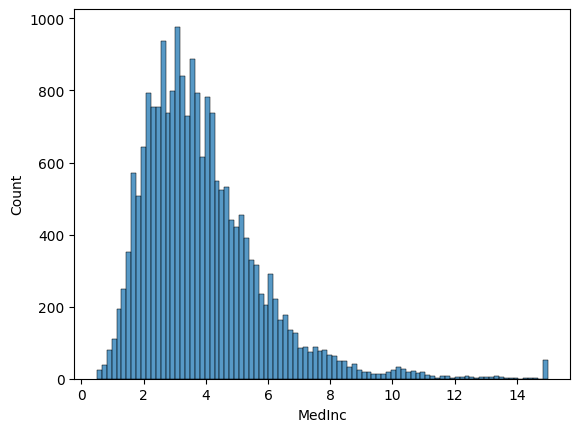

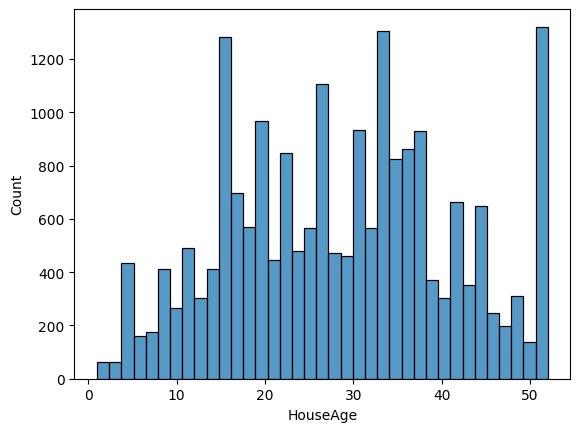

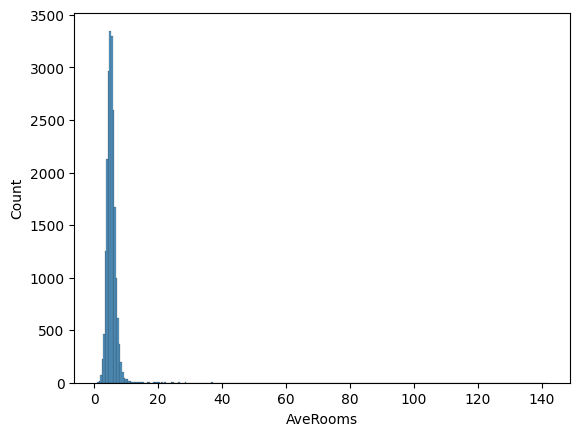

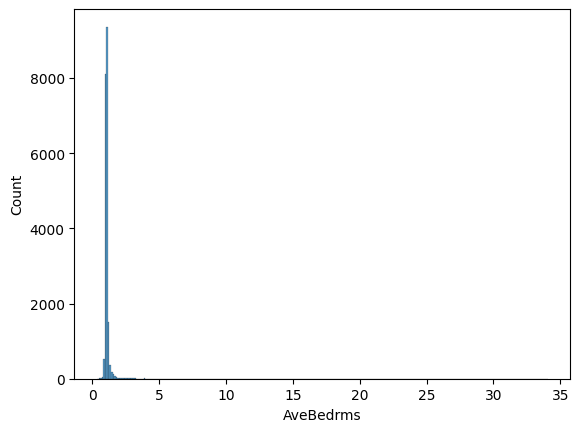

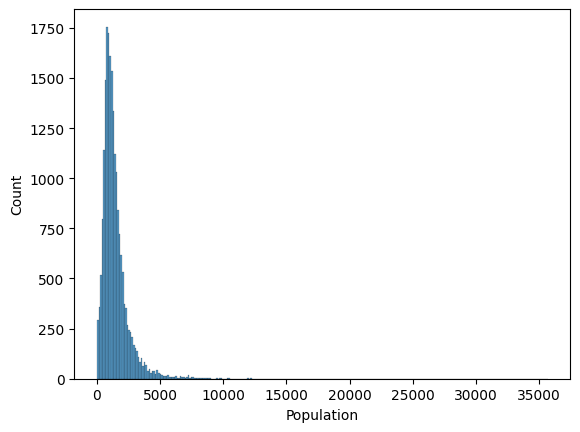

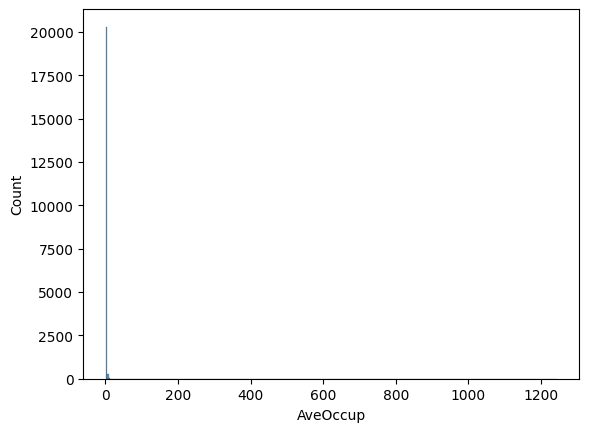

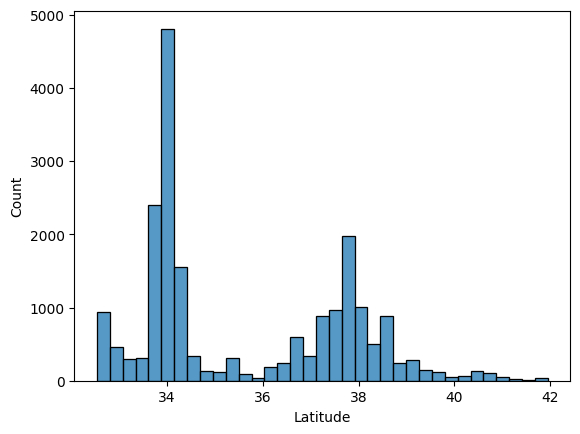

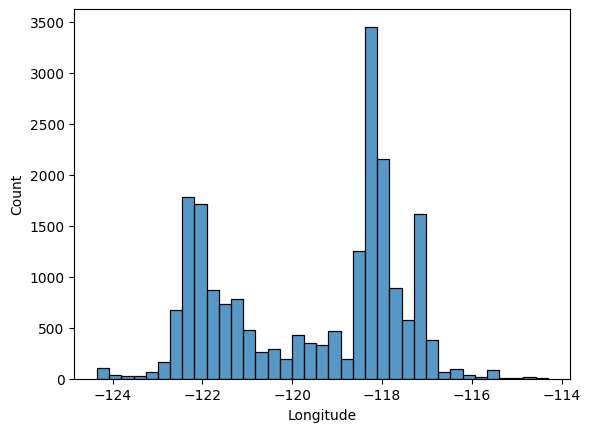

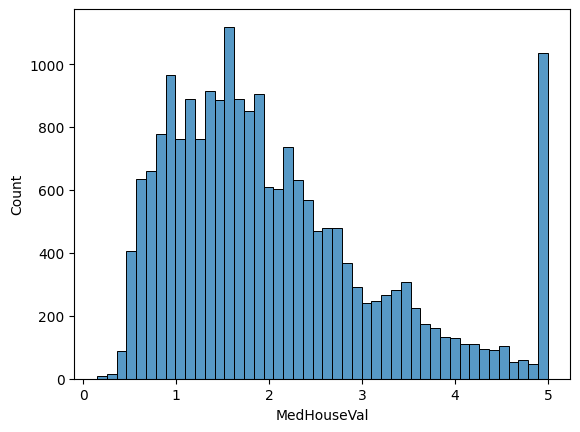

In [30]:
# histogram to understand distribution
for i in dataframe.select_dtypes(include="number").columns:
    sns.histplot(data=dataframe, x=i)
    plt.show()

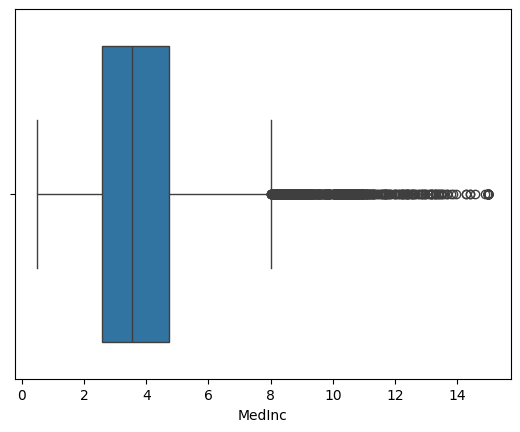

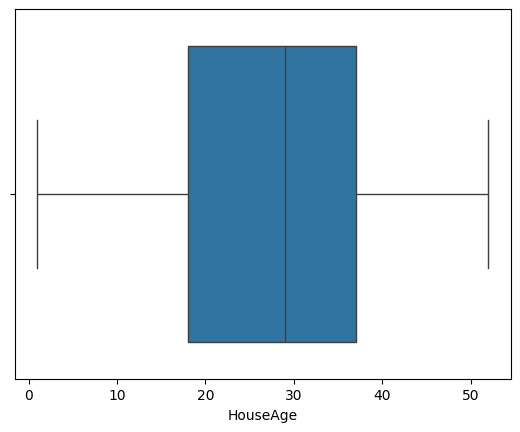

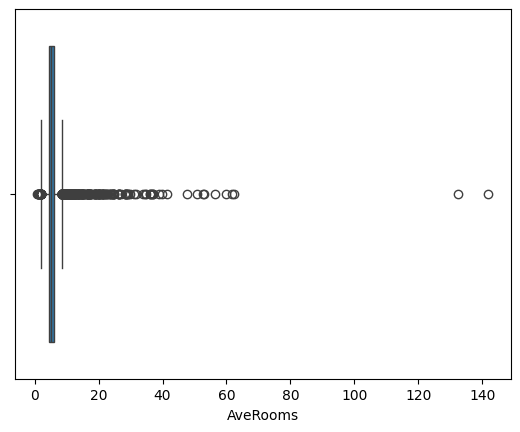

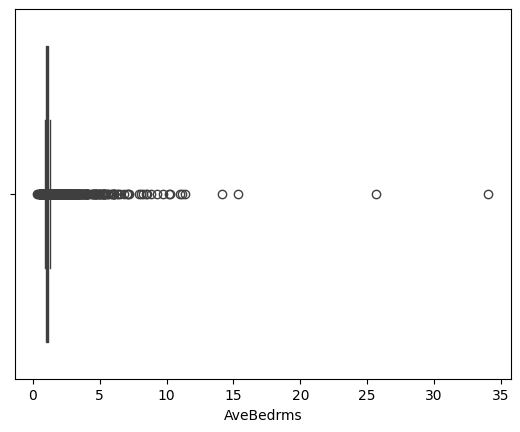

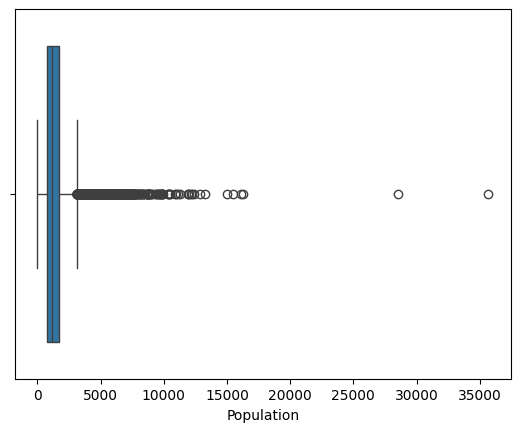

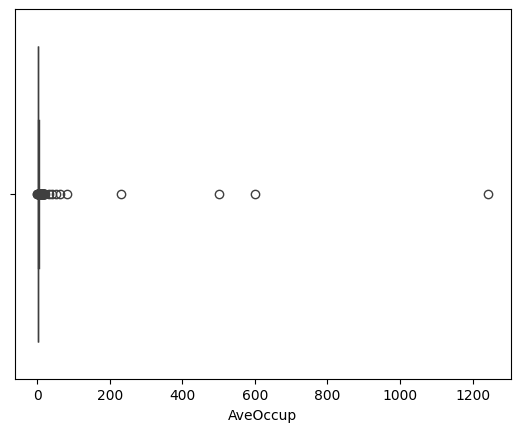

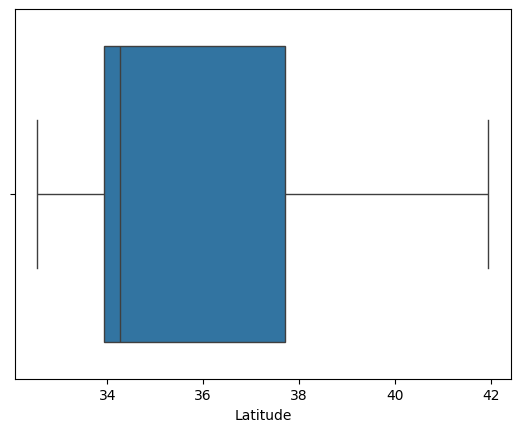

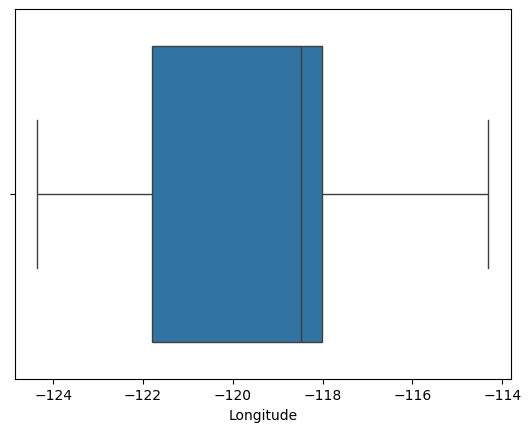

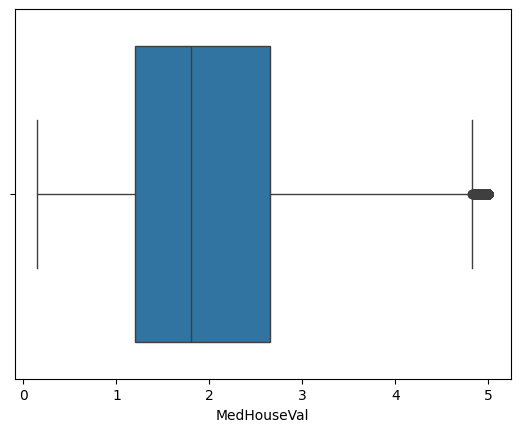

In [31]:
# Boxplot to identify Outliers
for i in dataframe.select_dtypes(include="number").columns:
    sns.boxplot(data=dataframe, x=i)
    plt.show()

In [38]:
features = dataset.feature_names
features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [46]:
dataframe.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

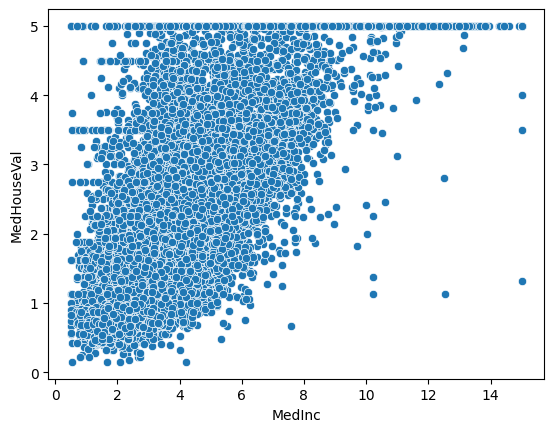

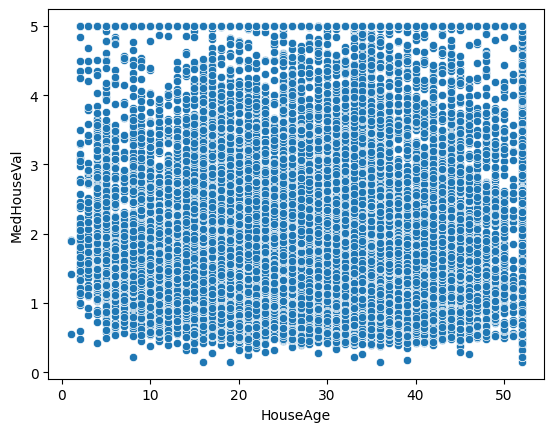

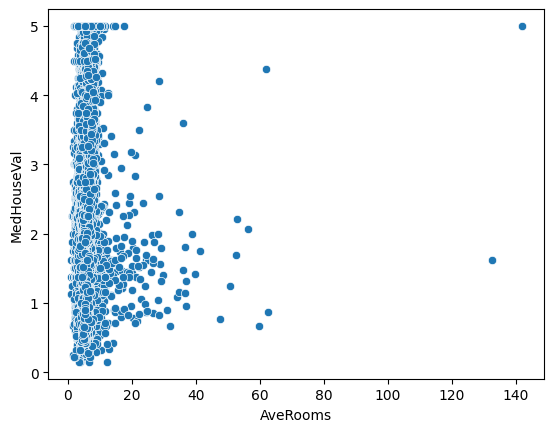

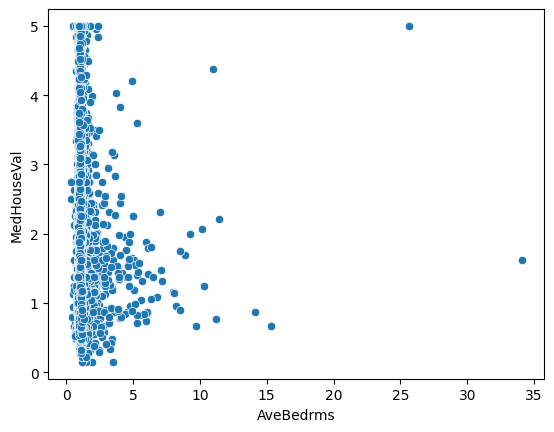

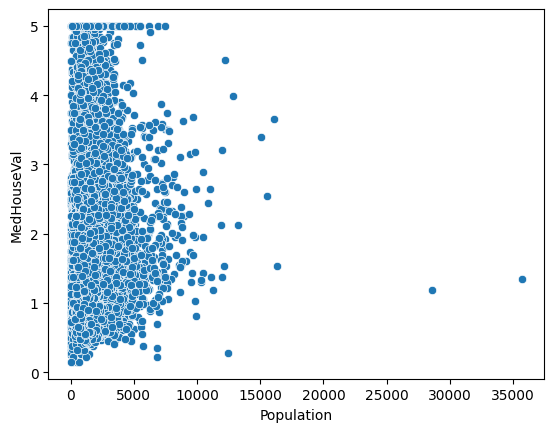

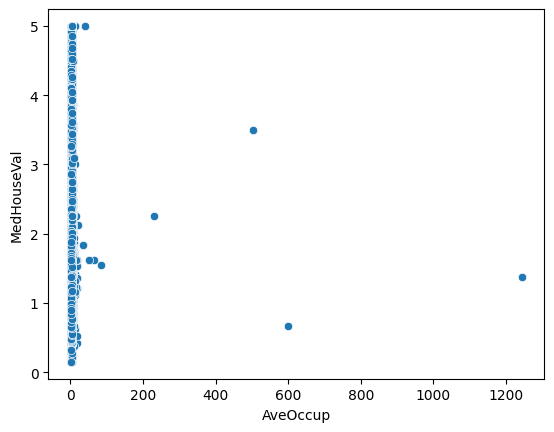

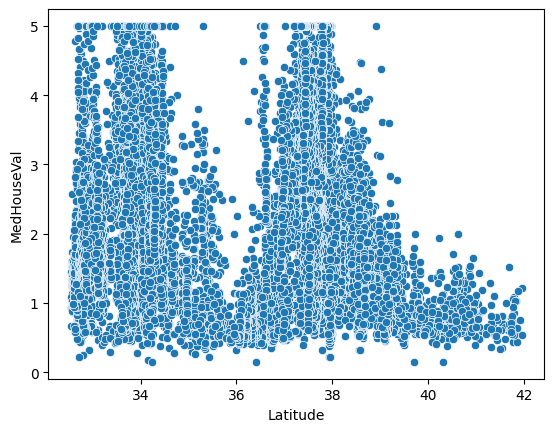

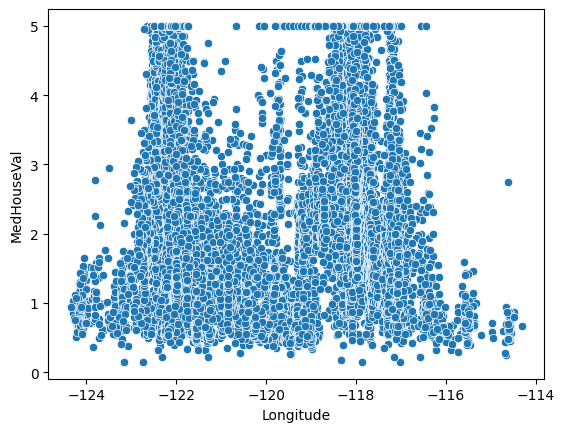

In [48]:
for i in features:
    sns.scatterplot(data=dataframe ,x = i, y= 'MedHouseVal')
    plt.show()

In [49]:
# Correlation with heatmap to interpret the relation and multicoliniarity
data_cor = dataframe.select_dtypes(include="number").corr()

<Axes: >

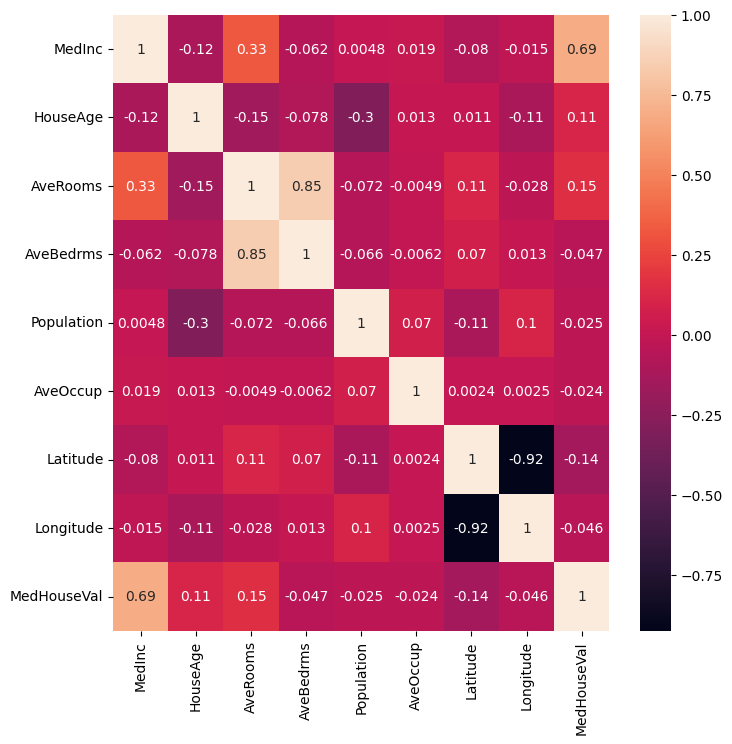

In [52]:
plt.figure(figsize=(8,8))
sns.heatmap(data=data_cor,annot=True)

### Train Test Split

In [61]:
X = dataframe.iloc[:,:-1]
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [62]:
y = dataframe.iloc[:,-1]

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

### Outliers treatment

In [65]:
def wisker(col):
    q1, q3 = np.percentile(col, [25,75])
    iqr = q3 - q1
    lw = q1-1.5*iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

In [66]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [67]:
for i in ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']:
    lw, uw = wisker(X_train[i])
    X_train[i] = np.where(X_train[i]<lw, lw, X_train[i])
    X_train[i] = np.where(X_train[i]>uw, uw, X_train[i])

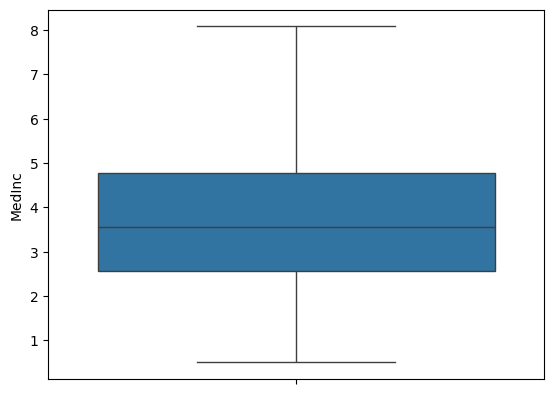

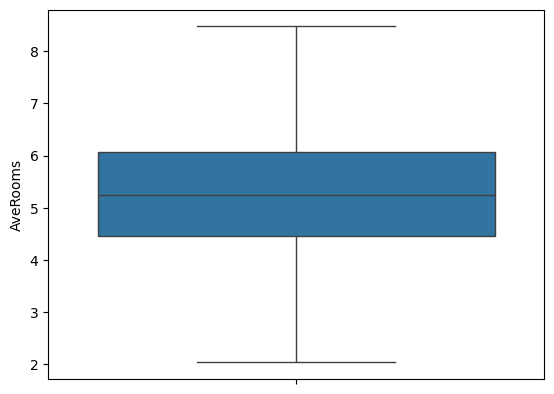

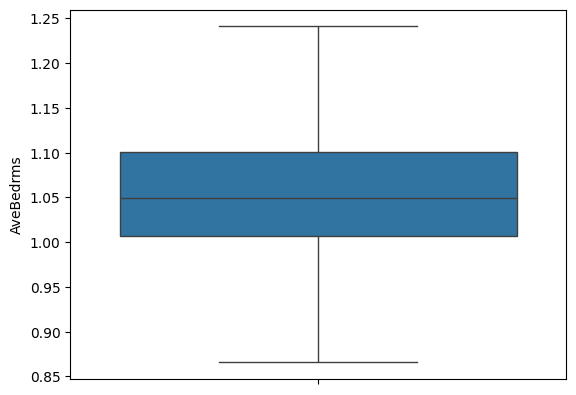

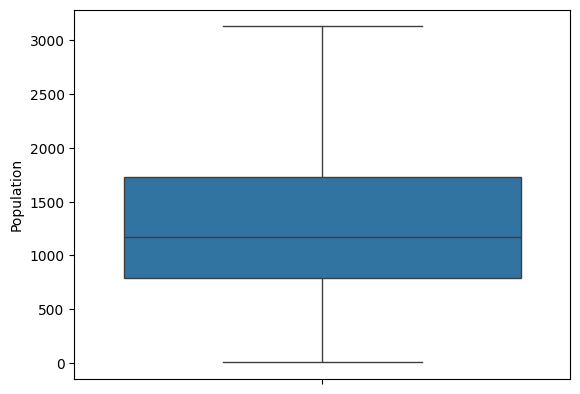

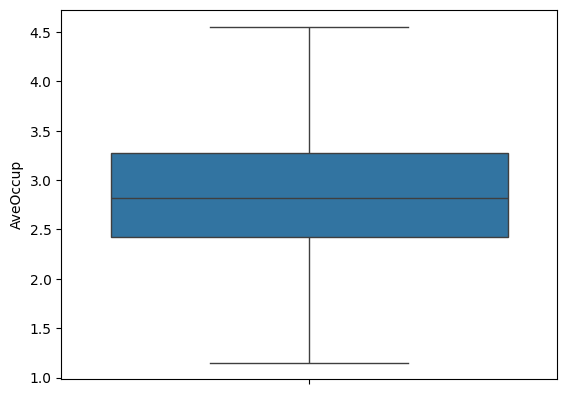

In [68]:
for i in ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']:
    sns.boxplot(X_train[i])
    plt.show()

### Scale the data

In [69]:
## Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [70]:
X_train = scaler.fit_transform(X_train)

In [71]:
X_test = scaler.transform(X_test)

### Model Training

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
Random_forest = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

In [74]:
Random_forest.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [75]:
y_pred = Random_forest.predict(X_test)

### Model Evaluation

In [76]:
residuals = y_test-y_pred
residuals

20046   -0.019635
3024    -0.287085
15663    0.124708
20484   -0.354440
9814     0.531865
           ...   
15362    0.352520
16623    0.645865
18086    0.293847
2144     0.007645
3665    -0.169320
Name: MedHouseVal, Length: 4128, dtype: float64

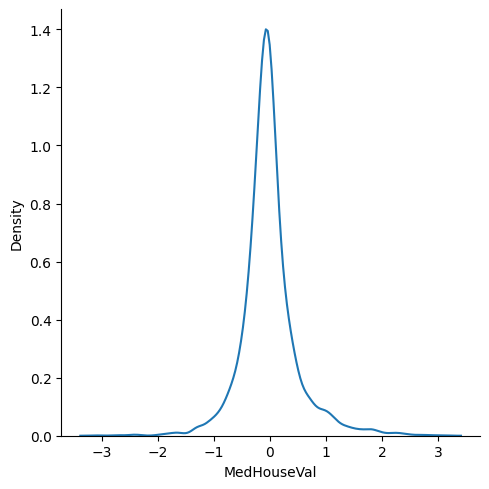

In [77]:
sns.displot(residuals, kind = 'kde')

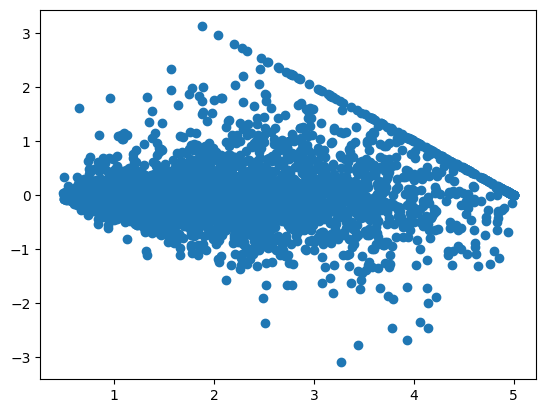

In [78]:
## Scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [80]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.2548248768658211
0.3293522847625971
0.8055379037406326


## New Data Prediction

In [82]:
dataset.data[12]

array([ 3.07500000e+00,  5.20000000e+01,  5.32264957e+00,  1.01282051e+00,
        1.09800000e+03,  2.34615385e+00,  3.78500000e+01, -1.22260000e+02])

In [83]:
scaler.transform(dataset.data[12].reshape(1,-1))

array([[-0.44255897,  1.85617335,  0.00727353, -0.566367  , -0.3137498 ,
        -0.79890755,  1.03287942, -1.33512123]])

In [84]:
Random_forest.predict(scaler.transform(dataset.data[12].reshape(1,-1)))

array([2.08313])

## Pickling the Model file for Deployment

In [85]:
import pickle

In [86]:
pickle.dump(Random_forest,open('Random_forest_model.pkl','wb'))

In [87]:
pickled_model = pickle.load(open('Random_forest_model.pkl','rb'))

In [88]:
pickled_model.predict(scaler.transform(dataset.data[12].reshape(1,-1)))

array([2.08313])

In [90]:
pickle.dump(scaler,open('scaling1.pkl','wb'))